In [1]:
import os
from pathlib import Path
import torch

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0"

device = torch.device('cpu')

In [2]:
import random
import io
import contextlib
import cv2

In [3]:
from yolort.data import COCODetectionDataModule

from yolort.utils.image_utils import (
    color_list,
    plot_one_box,
    cv2_imshow,
    load_names,
    parse_single_image,
)

In [4]:
# Get label names and COLORS list
import requests

labels = []
response = requests.get(
    "https://gitee.com/zhiqwang/yolov5-rt-stack/raw/master/notebooks/assets/coco.names")
names = response.text

for label in names.strip().split('\n'):
    labels.append(label)

COLORS = color_list()

The labels can also be obtained by

```python
labels = load_names('../notebooks/assets/coco.names')
```

## Setup the coco128 dataset and dataloader for testing

In [5]:
# Acquire the images and labels from the coco128 dataset
data_path = Path('data-bin')
coco128_dirname = 'coco128'
coco128_path = data_path / coco128_dirname
image_root = coco128_path / 'images' / 'train2017'
annotation_path = coco128_path / 'annotations'

batch_size = 16

In [6]:
with contextlib.redirect_stdout(io.StringIO()):
    datamodule = COCODetectionDataModule(image_root, annotations_path=annotation_path)

In [7]:
test_dataloader = iter(datamodule.train_dataloader(batch_size=batch_size))

## Sample images amd targets

In [8]:
images, targets = next(test_dataloader)

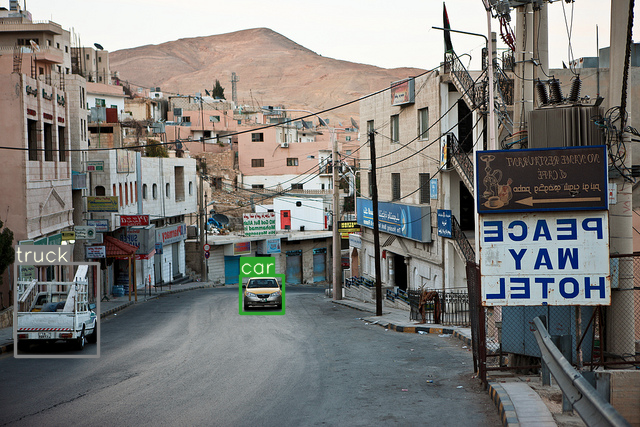

In [9]:
idx = random.randrange(batch_size)
img_raw = cv2.cvtColor(parse_single_image(images[idx]), cv2.COLOR_RGB2BGR)  # For visualization

for box, label in zip(targets[idx]['boxes'].tolist(), targets[idx]['labels'].tolist()):
    img_raw = plot_one_box(box, img_raw, color=COLORS[label % len(COLORS)], label=labels[label])

cv2_imshow(img_raw, imshow_scale=1)